In [1]:
from reinforcement_training import *
from notebook_game_helper import *
from keras.models import load_model

Using Theano backend.


In [2]:
# lets train a DQN model!
# make the model
hiddens = [{"size":50,"activation":"relu"}]
# make an optimizer
optimizer = Adam()
optimizer_str = "Adam"
model = baseline_model(optimizer, hiddens, ipt_mode = 3, opt_mode = 1)
# model = load_model("guided_rl_model_30x40_100000_10_600_Adam0.h5")

In [3]:
# model = baseline_model(optimizer, hiddens, ipt_mode = 3, opt_mode = 1)

In [3]:
# model.load_weights("curly/100000_x_10/guided_rl_model_30x40_100000_10_600_Adam0.h5")

In [ ]:
train_with_blocks(model, episodes = 10000, steps = 5, gamecount = 10000, )

In [5]:
training_game_size_x = 40
training_game_size_y = 30

training_game = HybridNaviGame(training_game_size_y,
                                training_game_size_x,
                                model,
                                tolerance = 2)
training_game.setup()

In [6]:
training_game.Navigator.strategy.mode = 3

In [7]:
training_episodes = 10000
steps = 2
# train the model
output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps,
                e_start = .9,
                e_stop = .1)

Episode 9999, Replay Loss: 0.0153: 100%|██████████| 10000/10000 [12:27<00:00, 13.37it/s]


In [ ]:
draw_game(training_game)

In [ ]:
for _ in range(10):
    training_game.add_block()

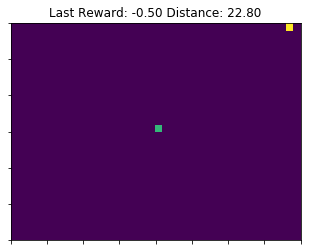

None

In [8]:
animate_game(training_game, n = 100, save = True)

In [9]:
model.save("curly_2.h5")

In [ ]:
training_game.Navigator.move(28, 38, False)

In [10]:
from os import listdir
from os.path import isfile, join
mypath = "images/"
filenames = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# join(mypath, f)
import imageio
images = []
for filename in filenames[1:]:
    images.append(imageio.imread(filename))
imageio.mimsave('curly/curly_gif_1.gif', images)

In [ ]:
training_game.Navigator.strategy.plan_movement()

In [ ]:
model.summary()

In [ ]:
122646 * 32/8

In [ ]:
model.regularizers